# LAB 1: DATA CLEANING

In [3]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# Fill Missing Data Example

In [4]:
#Dataset as a dataframe: create a set of lists
DataFrame = pd.DataFrame({'team':['A','A','A','A', np.nan, 'B', 'B', 'B'], 'position':['G','G','F','G','F','G','C','C'], 
                          'age':[21,22,21.5,50,60,np.nan,46,70],
                          'salary':[5000, 10000, 4000, 3000, 6000, 1000, 2000, 8000]})

In [5]:
#Numerical Features printed as a list of features
Numerical_Features = DataFrame.select_dtypes(exclude = ['object']).columns.tolist()
print(Numerical_Features)

['age', 'salary']


In [6]:
#printed as a list
dataframe_n = DataFrame[Numerical_Features]
print(dataframe_n)

    age  salary
0  21.0    5000
1  22.0   10000
2  21.5    4000
3  50.0    3000
4  60.0    6000
5   NaN    1000
6  46.0    2000
7  70.0    8000


In [7]:
#Now we fill in the missing data
imp_mean = SimpleImputer(missing_values = np.nan , strategy = 'mean')
imp_mean.fit(dataframe_n)
dataframe_n = imp_mean.transform(dataframe_n)
print(dataframe_n)

[[   21.   5000. ]
 [   22.  10000. ]
 [   21.5  4000. ]
 [   50.   3000. ]
 [   60.   6000. ]
 [   41.5  1000. ]
 [   46.   2000. ]
 [   70.   8000. ]]


In [8]:
#Categorical Features
Categorical_Features = DataFrame.select_dtypes(include = ['object']).columns.tolist()
print(Categorical_Features)

['team', 'position']


In [9]:
dataframe_c = DataFrame[Categorical_Features]
print(dataframe_c)

  team position
0    A        G
1    A        G
2    A        F
3    A        G
4  NaN        F
5    B        G
6    B        C
7    B        C


In [10]:
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imp_mean.fit(dataframe_c)
dataframe_c = imp_mean.transform(dataframe_c)
print(dataframe_c)

[['A' 'G']
 ['A' 'G']
 ['A' 'F']
 ['A' 'G']
 ['A' 'F']
 ['B' 'G']
 ['B' 'C']
 ['B' 'C']]


In [11]:
DataFrame[Numerical_Features] = dataframe_n
DataFrame[Categorical_Features] = dataframe_c

# Data Transformation

## Discretisation

In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer

In [18]:
DataFrame2 = pd.DataFrame({'team':['A','A','A','A', 'B', 'B', 'B', 'B'], 'position':['G','G','F','G','F','G','C','C'], 
                          'age':[21,22,21.5,50,60,40,46,70],
                          'salary':[5000, 10000, 4000, 3000, 6000, 1000, 2000, 8000]})

In [39]:
Categorical_Features_2 = DataFrame2.select_dtypes(exclude = ['object']).columns.tolist()
dataframe_c_2 = DataFrame2[Categorical_Features_2]
print(dataframe_c_2)

    age  salary
0  21.0    5000
1  22.0   10000
2  21.5    4000
3  50.0    3000
4  60.0    6000
5  40.0    1000
6  46.0    2000
7  70.0    8000


In [40]:
est = KBinsDiscretizer(n_bins = 3, strategy = 'uniform', encode = 'ordinal')
c = est.fit(dataframe_c_2)
print(c.bin_edges_)

[array([21.        , 37.33333333, 53.66666667, 70.        ])
 array([ 1000.,  4000.,  7000., 10000.])]


In [41]:
dataframe_c_2 = est.transform(dataframe_c_2)
print(dataframe_c_2)

[[0. 1.]
 [0. 2.]
 [0. 1.]
 [1. 0.]
 [2. 1.]
 [1. 0.]
 [1. 0.]
 [2. 2.]]


## Normalisation

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
DataFrame2 = pd.DataFrame({'team':['A','A','A','A', 'B', 'B', 'B', 'B'], 'position':['G','G','F','G','F','G','C','C'], 
                          'age':[21,22,21.5,50,60,40,46,70],
                          'salary':[5000, 10000, 4000, 3000, 6000, 1000, 2000, 8000]})

In [35]:
Numerical_Features_2 = DataFrame2.select_dtypes(exclude = ['object']).columns.tolist()
dataframe_n_2 = DataFrame2[Numerical_Features_2]
print(dataframe_n_2)

    age  salary
0  21.0    5000
1  22.0   10000
2  21.5    4000
3  50.0    3000
4  60.0    6000
5  40.0    1000
6  46.0    2000
7  70.0    8000


In [36]:
normaliser = MinMaxScaler(feature_range = (0,1))
norm_data = normaliser.fit_transform(dataframe_n_2)
print(norm_data)

[[0.         0.44444444]
 [0.02040816 1.        ]
 [0.01020408 0.33333333]
 [0.59183673 0.22222222]
 [0.79591837 0.55555556]
 [0.3877551  0.        ]
 [0.51020408 0.11111111]
 [1.         0.77777778]]


In [44]:
DataFrame2[Numerical_Features_2] = norm_data
print(DataFrame2)

  team position       age    salary
0    A        G  0.000000  0.444444
1    A        G  0.020408  1.000000
2    A        F  0.010204  0.333333
3    A        G  0.591837  0.222222
4    B        F  0.795918  0.555556
5    B        G  0.387755  0.000000
6    B        C  0.510204  0.111111
7    B        C  1.000000  0.777778


# LAB 2: APRIORI

In [1]:
import numpy as np
import pandas as pd

In [2]:
#read dataset as .csv file with \t as a delimiter
DataFrame = pd.read_csv("kaggle_store_data.csv", delimiter = ',', header = 0, index_col = 0)
print(DataFrame)

                          almonds      avocado    vegetables mix green grapes  \
shrimp                                                                          
burgers                 meatballs         eggs               NaN          NaN   
chutney                       NaN          NaN               NaN          NaN   
turkey                    avocado          NaN               NaN          NaN   
mineral water                milk   energy bar  whole wheat rice    green tea   
low fat yogurt                NaN          NaN               NaN          NaN   
...                           ...          ...               ...          ...   
butter                 light mayo  fresh bread               NaN          NaN   
burgers         frozen vegetables         eggs      french fries    magazines   
chicken                       NaN          NaN               NaN          NaN   
escalope                green tea          NaN               NaN          NaN   
eggs              frozen smo

In [3]:
from apyori import apriori

In [4]:
#shape of dataset (7500, 19)
#association rules from transactions
tuples = []
for i in range(0, 7500):
    tuple = []
    for j in range(0, 19):
        val = DataFrame.values[i, j]
        if str(val) != 'nan':
            tuple.append(val)
    tuples.append(tuple)
    tupleslist = DataFrame.values.tolist()
    #print(tupleslist[i],'\n')    

In [ ]:
mylist = [[x for x in sublist if str(x)!= 'nan']
         for sublist in tupleslist]
for a in range(len(mylist)):
    print(mylist[a],'\n')

In [ ]:
#minsup = 0.5%, minconf = 20%
Association_Rules = apriori(tuples, min_support = 0.005, min_confidence = 0.2,
                            min_length = 1)
Association_Results = list(Association_Rules)
print("{} derived relations".format(len(Association_Results)))
#print(Association_Results)

In [ ]:
#Convert into rules
for item in Association_Results:
    print(item)
    pair = item[0]
    items = [y for y in pair]
    print("Frequent Itemsets" + str(items), '\n')
    print("Support" + str(item[1]), '\n')
    if(len(pair) > 1):
        for rule in item[2]:
            print("Rule: " + str(rule[0]) + "->" + str(rule[1]) , "\n")
            print("Confidence: " + str(rule[2]), "\n")
            print("Lift: " + str(rule[3]), "\n")
            print("_______________________________________________________________________")

# LAB 3: FP GROWTH AND ECLAT

In [2]:
import pyfpgrowth

In [3]:
transacts = [['Milk', 'Bread', 'Saffron'],
             ['Milk', 'Saffron'],
            ['Bread', 'Saffron', 'Wafer'],
            ['Bread', 'Wafer']]

In [47]:
freqpatt = pyfpgrowth.find_frequent_patterns(transactions = transacts,support_threshold = 1)
for x, y in freqpatt.items():
    print(x, ':', y)

('Milk',) : 2
('Milk', 'Saffron') : 2
('Bread', 'Milk') : 1
('Bread', 'Milk', 'Saffron') : 1
('Wafer',) : 2
('Saffron', 'Wafer') : 1
('Bread', 'Wafer') : 2
('Bread', 'Saffron', 'Wafer') : 1
('Bread',) : 3
('Saffron',) : 3
('Bread', 'Saffron') : 2


In [48]:
rules = pyfpgrowth.generate_association_rules(patterns = freqpatt, confidence_threshold = 0.5)
for a, b in rules.items():
    print(a, ':', b)

('Milk',) : (('Bread', 'Saffron'), 0.5)
('Saffron',) : (('Bread',), 0.6666666666666666)
('Bread', 'Milk') : (('Saffron',), 1.0)
('Bread', 'Saffron') : (('Wafer',), 0.5)
('Milk', 'Saffron') : (('Bread',), 0.5)
('Wafer',) : (('Bread', 'Saffron'), 0.5)
('Bread',) : (('Saffron',), 0.6666666666666666)
('Bread', 'Wafer') : (('Saffron',), 0.5)
('Saffron', 'Wafer') : (('Bread',), 1.0)


In [49]:
import numpy as np
import pandas as pd
import pyfpgrowth

In [50]:
Data = pd.read_csv("kaggle_store_data.csv", header=None)

In [53]:
#shape of dataset (7500, 19)
#association rules from transactions
tuples = []
for i in range(0, 7500):
    tuple = []
    for j in range(0, 19):
        val = Data.values[i, j]
        if str(val) != 'nan':
            tuple.append(val)
    tuples.append(tuple)
    tupleslist = Data.values.tolist()
    #print(tupleslist[i],'\n')
########################################################
mylist = [[x for x in sublist if str(x)!= 'nan']
         for sublist in tupleslist]
for a in range(len(mylist)):
    print(mylist[a],'\n')

['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'] 

['burgers', 'meatballs', 'eggs'] 

['chutney'] 

['turkey', 'avocado'] 

['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'] 

['low fat yogurt'] 

['whole wheat pasta', 'french fries'] 

['soup', 'light cream', 'shallot'] 

['frozen vegetables', 'spaghetti', 'green tea'] 

['french fries'] 

['eggs', 'pet food'] 

['cookies'] 

['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'] 

['spaghetti', 'champagne', 'cookies'] 

['mineral water', 'salmon'] 

['mineral water'] 

['shrimp', 'chocolate', 'chicken', 'honey', 'oil', 'cooking oil', 'low fat yogurt'] 

['turkey', 'eggs'] 

['turkey', 'fresh tuna', 'tomatoes', 'spaghetti', 'mineral water', 'black tea', 'salmon', 'eggs', 'c

In [54]:
#minsup = 200 , minconf = 0.2
freqpatt2 = pyfpgrowth.find_frequent_patterns(transactions = mylist,support_threshold = 200)
for x2, y2 in freqpatt2.items():
    print(x2, ':', y2)

('energy drink',) : 200
('energy bar',) : 203
('ham',) : 203
('light mayo',) : 204
('yogurt cake',) : 205
('red wine',) : 211
('whole wheat pasta',) : 221
('butter',) : 226
('tomato juice',) : 228
('cottage cheese',) : 239
('hot dogs',) : 243
('avocado',) : 250
('brownies',) : 253
('salmon',) : 319
('fresh bread',) : 323
('champagne',) : 351
('honey',) : 356
('herb & pepper',) : 371
('soup',) : 379
('cooking oil',) : 383
('grated cheese',) : 393
('whole wheat rice',) : 439
('chicken',) : 450
('turkey',) : 469
('frozen smoothie',) : 475
('olive oil',) : 494
('mineral water', 'olive oil') : 207
('tomatoes',) : 513
('shrimp',) : 536
('low fat yogurt',) : 574
('escalope',) : 595
('cookies',) : 603
('cake',) : 608
('cake', 'mineral water') : 206
('burgers',) : 654
('burgers', 'eggs') : 216
('pancakes',) : 713
('mineral water', 'pancakes') : 253
('frozen vegetables', 'spaghetti') : 209
('frozen vegetables', 'mineral water') : 268
('ground beef', 'spaghetti') : 294
('ground beef', 'mineral wa

In [55]:
rules2 = pyfpgrowth.generate_association_rules(patterns = freqpatt2, confidence_threshold = 0.2)
for a2, b2 in rules2.items():
    print(a2, ':', b2)

('olive oil',) : (('mineral water',), 0.4190283400809717)
('cake',) : (('mineral water',), 0.33881578947368424)
('burgers',) : (('eggs',), 0.3302752293577982)
('pancakes',) : (('mineral water',), 0.3548387096774194)
('mineral water',) : (('eggs',), 0.21364653243847875)
('eggs',) : (('mineral water',), 0.28338278931750743)


# LAB 4: LOGISTIC REGRESSION AND ANOMALLY AMENDATION

In [2]:
import numpy as np
import pandas as pd
#Example dataset as lists
x = [1, 2, 3, 4, 5, 6 , 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
#x = [1, 2, 3, 4, 5]
#y = [2, 4, 5, 4, 6]
y = [2, 4, 5, 4, 6 , 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

In [3]:
#Find slope of the lines
x_mean = sum(x)/len(x)
y_mean = sum(y)/len(y)
print("x_mean: ", x_mean,'\n')
print("y_mean: ", y_mean, '\n')

x_mean:  10.5 

y_mean:  11.55 



In [4]:
#Assume input is x and output is y
xdiff = []
xxtotal = 0
xytotal = 0
for i in range(len(x)):
    xdiff = (x[i] - x_mean)**2
    #print("x:", xdiff)
    xxtotal = xxtotal + xdiff
    ydiff = (x[i] - x_mean) * (y[i] - y_mean)
    #print("y:", ydiff)
    xytotal = xytotal + ydiff
    
#Sumxx = np.sum(xdiff, axis = 0, keepdims = True)
#Sumxy = np.sum(ydiff, axis = 0, keepdims = True)

print("SSx: ", "{0: .3f}".format(xxtotal), '\n')
print("SPxy: ", "{0: .3f}".format(xytotal), '\n')

SSx:   665.000 

SPxy:   655.500 



In [5]:
slope = xytotal / xxtotal
print("Slope: ", "{0: .3f}".format(slope), '\n')
intercept = y_mean - (slope * x_mean)
print("Intercept: ", "{0: .3f}".format(intercept), '\n')
print("y = ", slope, "x + ", intercept, '\n')

Slope:   0.986 

Intercept:   1.200 

y =  0.9857142857142858 x +  1.1999999999999993 



In [6]:
predicted = []
residual = []
#residual = predicted - actual
for p in range(len(x)):
    #predicted = slope * (x[p]) + intercept
    predicted.append(slope * (x[p]) + intercept)
    residual.append(predicted[p] - y[p])
    print("x:", x[p]," y:", y[p], "predicted:", "{0: .2f}".format(predicted[p]), "residual:", "{0: .2f}".format(residual[p]))

#residual = predicted[p] - y[p]
#residual.append(predicted - y[p])


x: 1  y: 2 predicted:  2.19 residual:  0.19
x: 2  y: 4 predicted:  3.17 residual: -0.83
x: 3  y: 5 predicted:  4.16 residual: -0.84
x: 4  y: 4 predicted:  5.14 residual:  1.14
x: 5  y: 6 predicted:  6.13 residual:  0.13
x: 6  y: 7 predicted:  7.11 residual:  0.11
x: 7  y: 8 predicted:  8.10 residual:  0.10
x: 8  y: 9 predicted:  9.09 residual:  0.09
x: 9  y: 10 predicted:  10.07 residual:  0.07
x: 10  y: 11 predicted:  11.06 residual:  0.06
x: 11  y: 12 predicted:  12.04 residual:  0.04
x: 12  y: 13 predicted:  13.03 residual:  0.03
x: 13  y: 14 predicted:  14.01 residual:  0.01
x: 14  y: 15 predicted:  15.00 residual:  0.00
x: 15  y: 16 predicted:  15.99 residual: -0.01
x: 16  y: 17 predicted:  16.97 residual: -0.03
x: 17  y: 18 predicted:  17.96 residual: -0.04
x: 18  y: 19 predicted:  18.94 residual: -0.06
x: 19  y: 20 predicted:  19.93 residual: -0.07
x: 20  y: 21 predicted:  20.91 residual: -0.09


In [7]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
import numpy as np
from numpy import ndarray
from numpy.linalg import eig

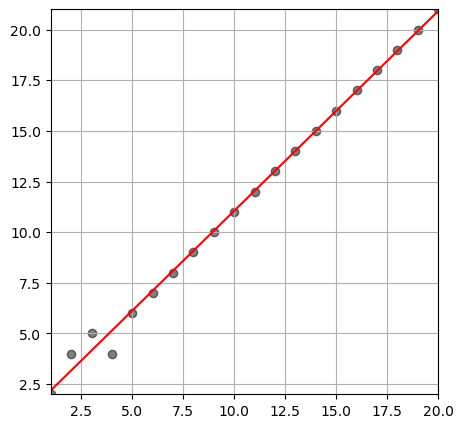

In [8]:
plt.figure(figsize=(5, 5))
plt.scatter(x, y, color = "black", alpha = 0.5)
plt.plot(x, predicted, color = "red")
plt.margins(x = 0, y = 0) 
plt.grid()
plt.axis('auto')
plt.show()

[ 0.49508095 -2.20882271 -2.24690586  3.04665201  0.34274835  0.3046652
  0.26658205  0.2284989   0.19041575  0.1523326   0.11424945  0.0761663
  0.03808315  0.         -0.03808315 -0.0761663  -0.11424945 -0.1523326
 -0.19041575 -0.2284989 ]


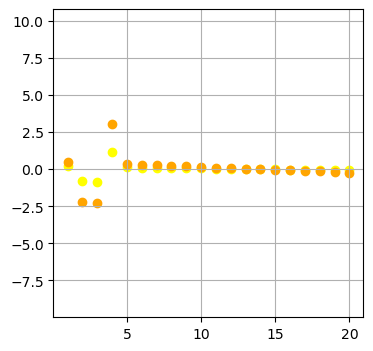

In [10]:
standardised_residuals = residual / np.std(residual)
print(standardised_residuals)

plt.figure(figsize=(4, 4))
plt.scatter(x, residual, color = "yellow")
plt.scatter(x, standardised_residuals, color = "orange")
plt.grid()
plt.axis('equal')
plt.show()

# LAB 5: K-MEANS AND K-MEDOIDS

In [38]:
import numpy as np
import pandas as pd

In [39]:
DataFrame3 = pd.read_csv("weather_nominal.csv", index_col = "id")
print(DataFrame3)

     outlook temperature humidity  windy play
id                                           
1      sunny         hot     high  False   no
2      sunny         hot     high   True   no
3   overcast         hot     high  False  yes
4      rainy        mild     high  False  yes
5      rainy        cool   normal  False  yes
6      rainy        cool   normal   True   no
7   overcast        cool   normal   True  yes
8      sunny        mild     high  False   no
9      sunny        cool   normal  False  yes
10     rainy        mild   normal  False  yes
11     sunny        mild   normal   True  yes
12  overcast        mild     high   True  yes
13  overcast         hot   normal  False  yes
14     rainy        mild     high   True   no


In [40]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [43]:
myencoder = LabelEncoder()

myencoder.fit(DataFrame3["outlook"])
DataFrame3["outlook"] = myencoder.transform(DataFrame3["outlook"])
myencoder.fit(DataFrame3["temperature"])
DataFrame3["temperature"] = myencoder.transform(DataFrame3["temperature"])
myencoder.fit(DataFrame3["humidity"])
DataFrame3["humidity"] = myencoder.transform(DataFrame3["humidity"])
myencoder.fit(DataFrame3["windy"])
DataFrame3["windy"] = myencoder.transform(DataFrame3["windy"])
myencoder.fit(DataFrame3["play"])
DataFrame3["play"] = myencoder.transform(DataFrame3["play"])

In [46]:
kmeans = KMeans(n_clusters = 2).fit(DataFrame3.iloc[:, :])
print(kmeans.labels_, '\n')
print(kmeans.cluster_centers_, '\n')

[0 0 0 0 1 1 1 0 1 0 0 0 1 0] 

[[1.22222222 1.66666667 0.22222222 0.44444444 0.55555556]
 [0.8        0.2        1.         0.4        0.8       ]] 



# LAB 6: DBSCAN

In [5]:
import numpy as np
import pandas as pd

In [6]:
Glass = pd.read_csv("glass.csv")
print(Glass)

      id     'RI'   'Na'  'Mg'  'Al'   'Si'   'K'   'Ca'  'Ba'  'Fe'  \
0      1  1.51793  12.79  3.50  1.12  73.03  0.64   8.77   0.0  0.00   
1      2  1.51643  12.16  3.52  1.35  72.89  0.57   8.53   0.0  0.00   
2      3  1.51793  13.21  3.48  1.41  72.64  0.59   8.43   0.0  0.00   
3      4  1.51299  14.40  1.74  1.54  74.55  0.00   7.59   0.0  0.00   
4      5  1.53393  12.30  0.00  1.00  70.16  0.12  16.19   0.0  0.24   
..   ...      ...    ...   ...   ...    ...   ...    ...   ...   ...   
209  210  1.51610  13.42  3.40  1.22  72.69  0.59   8.32   0.0  0.00   
210  211  1.51592  12.86  3.52  2.12  72.66  0.69   7.97   0.0  0.00   
211  212  1.51613  13.92  3.52  1.25  72.88  0.37   7.94   0.0  0.14   
212  213  1.51689  12.67  2.88  1.71  73.21  0.73   8.54   0.0  0.00   
213  214  1.51852  14.09  2.19  1.66  72.67  0.00   9.32   0.0  0.00   

                   'Type'  
0        build wind float  
1        vehic wind float  
2        build wind float  
3               tablewa

In [7]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder

In [8]:
#Encoding for categorical data
encoder = LabelEncoder()
encoder.fit(Glass["'Type'"])
Glass["'Type'"] = encoder.transform(Glass["'Type'"])

[ 0  1  0 -1 -1  0  1  0  1  0  0  0  0  1  1  0  1  0  0  0  0 -1  0  0
  0  0  0  1  0  1  0  1 -1  0  0  0  0  0  0  0  0  0  0  0  1  0 -1  0
  0  0  0  0  0  0  1  0 -1  0  1  0  0  0  0  0  0  1  0  1 -1  0  1  0
  1  0  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  1  0  0  1  1  0
  1  0  0  0  0  0 -1  1  1 -1  0  1  0  0  0  1  0  1  1  1  0 -1  0  0
  0  0  0  0  0  0 -1  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1  0  0  0  1  0  1  0  0  0  0  0  1 -1  0  0  0  0
  0  1  0  0  0 -1  0  1  0  0  0  1  0  0  1  0  0  1  0  0  1  0  0  0
  1  1  1  0  0  0  0  0  0  0  1  0  0  0  1  0  0  1  0  0  0  1]


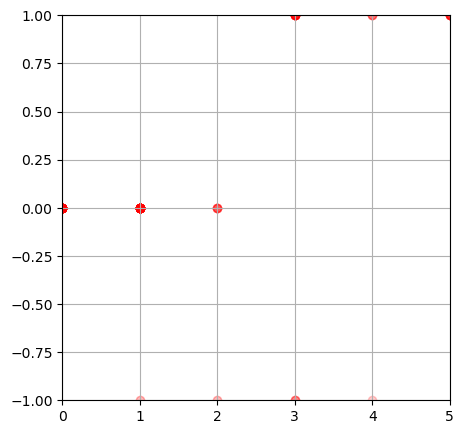

In [22]:
#clustering using DBSCAN, epsilon = 2, min samples = 3
#all columns except first
dbscan = DBSCAN(eps = 2, min_samples = 3).fit(Glass.iloc[:, 1:])
print(dbscan.labels_)

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
import numpy as np
from numpy import ndarray
from numpy.linalg import eig
plt.figure(figsize=(5, 5))
#a = plt.axes(projection ="3d")

#a.scatter3D(Glass["'Type'"],dbscan.labels_, alpha = 0.1)
plt.scatter(Glass["'Type'"],dbscan.labels_, alpha = 0.1, color = "red")
plt.margins(x = 0, y = 0) 
plt.grid()
plt.axis('auto')
plt.show()

In [7]:
#Agglomerative example
from sklearn.cluster import AgglomerativeClustering

In [8]:
agglomerative = AgglomerativeClustering().fit(Glass.iloc[:, 1:])
print(agglomerative.labels_)

[1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1
 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1
 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1
 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0]
